In [189]:
library(dplyr)
library(ggplot2)

df <- read.csv(paste("C:/Users/saavedrak/Desktop/",
                     "USP_587_data/HW2/household_hbw.csv", sep=""))

In [190]:
df.resveh <- df.hbw %>%
    select(resty, hhveh, htrips) %>%
    filter(resty <7 ) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(resty, hhveh) 
print(nrow(df.resveh))
df.resveh.sum <- summarize(df.resveh, count=n(), avg_trips = mean(htrips))
df.resveh.sum

[1] 6437


resty,hhveh,count,avg_trips
1,0,90,8.222222
1,1,1203,7.142145
1,2,2351,11.220757
1,3,1498,11.864486
2,0,26,10.576923
2,1,110,6.881818
2,2,39,11.153846
2,3,13,15.461538
3,0,219,7.716895
3,1,613,6.905383


In [191]:
ln.resveh.sum <- lm(avg_trips ~ hhveh + resty, data=df.resveh.sum)
summary(ln.resveh.sum)


Call:
lm(formula = avg_trips ~ hhveh + resty, data = df.resveh.sum)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0157 -0.8308 -0.4202  0.7225  4.0958 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2598     1.3423   7.644 3.67e-06 ***
hhveh         1.3100     0.4299   3.047  0.00935 ** 
resty        -1.4120     0.4299  -3.285  0.00592 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.922 on 13 degrees of freedom
Multiple R-squared:  0.607,	Adjusted R-squared:  0.5465 
F-statistic: 10.04 on 2 and 13 DF,  p-value: 0.002311


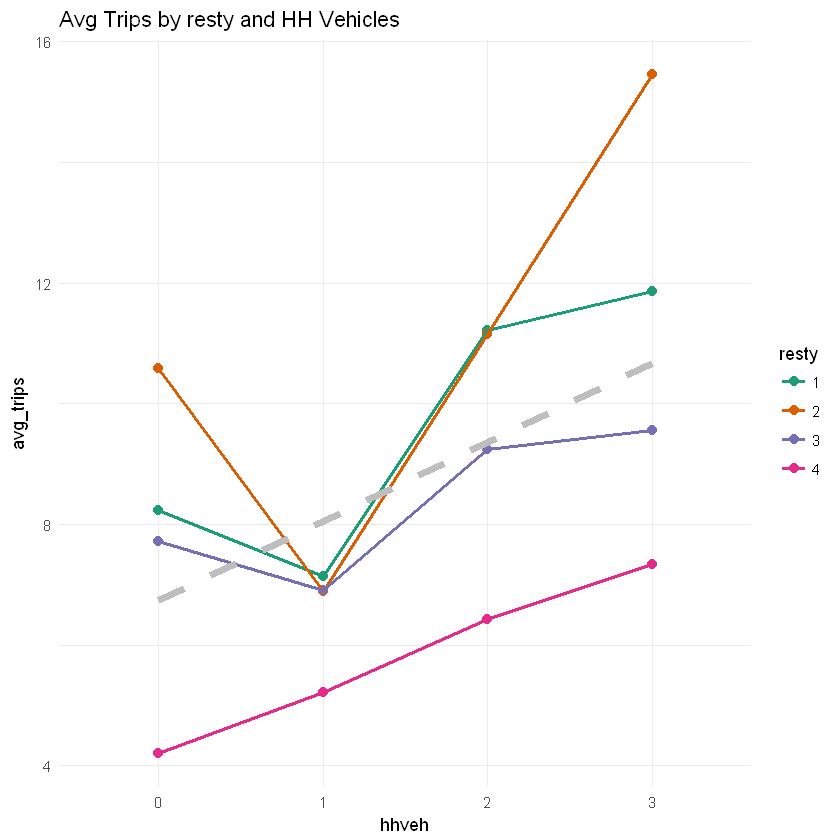

In [158]:
df.resveh.sum$ hhveh <- as.factor(df.resveh.sum$hhveh)
df.resveh.sum$ resty <- as.factor(df.resveh.sum$resty)

df.resveh.sum %>%
    ggplot(aes(x=hhveh, y=avg_trips, color=resty, group=resty)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhveh, y=avg_trips, color=resty), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by resty and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [159]:
data <- data.frame(resty = 4, hhveh=2)
predict(ln.resveh.sum, data, interval="predict")

,fit,lwr,upr
1,7.231879,2.706039,11.75772


In [160]:
# Start with fresh data frame
# Recode categories
df.resveh.new <- df.hbw %>%
    select(resty, hhveh, htrips) %>%
    mutate(resty1=as.numeric(resty==1)) %>%
    mutate(resty2=as.numeric(resty==2)) %>%
    mutate(resty3=as.numeric(resty==3)) %>%
    mutate(resty4=as.numeric(resty==4)) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(resty1, resty2, resty3, resty4, hhveh) %>%
    mutate(avg_trips = mean(htrips))

# Manual Error calcs
df.resveh.new$ResError <- (df.resveh.new$htrips - 
                           df.resveh.new$avg_trips)^2
df.resveh.new$TotError <- (df.resveh.new$htrips - 
                           mean(df.resveh.new$htrips))^2
SSE <- sum(df.resveh.new$ResError)
SST <- sum(df.resveh.new$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 8
n <- nrow(df.resveh.new)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)


[1] 0.07539715
[1] 0.07439215


In [196]:
ln.resveh.new <- lm(htrips ~ factor(hhveh) * factor(resty), data=df.resveh.new)
summary(ln.resveh.new)


Call:
lm(formula = htrips ~ factor(hhveh) * factor(resty), data = df.resveh.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.864  -5.142  -1.577   3.136  69.136 

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     8.2222     0.7938  10.358  < 2e-16 ***
factor(hhveh)1                 -1.0801     0.8230  -1.312 0.189434    
factor(hhveh)2                  2.9985     0.8089   3.707 0.000211 ***
factor(hhveh)3                  3.6423     0.8173   4.456 8.48e-06 ***
factor(resty)2                  2.3547     1.6767   1.404 0.160269    
factor(resty)3                 -0.5053     0.9429  -0.536 0.592040    
factor(resty)4                 -4.0222     2.5103  -1.602 0.109140    
factor(resty)7                 -5.2222     7.5726  -0.690 0.490458    
factor(resty)9                 -8.2222     7.5726  -1.086 0.277615    
factor(hhveh)1:factor(resty)2  -2.6150     1.8369  -1.424 

##  AVG TRIPS by HHSize and HHVeh

In [162]:
# Start with fresh data frame
df.persveh <- df.hbw %>%
    select(hhsiz, hhveh, htrips) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhsiz, hhveh) %>%
    mutate(avg_trips = mean(htrips))

# Manual Error calcs
df.persveh$ResError <- (df.persveh$htrips - 
                           df.persveh$avg_trips)^2
df.persveh$TotError <- (df.persveh$htrips - 
                           mean(df.persveh$htrips))^2
SSE <- sum(df.persveh$ResError)
SST <- sum(df.persveh$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 8
n <- nrow(df.persveh)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

[1] 0.4167724
[1] 0.4161385


In [197]:
fit <- lm(htrips ~ factor(hhsiz) * factor(hhveh), data=df.persveh, )
summary(fit)
data <- data.frame(hhsiz=2, hhveh=2)
predict(fit, data, interval="predict")


Call:
lm(formula = htrips ~ factor(hhsiz) * factor(hhveh), data = df.persveh)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.667  -3.828  -0.467   2.964  61.964 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    6.46718    0.37148  17.409  < 2e-16 ***
factor(hhsiz)2                 3.28754    0.90131   3.648 0.000267 ***
factor(hhsiz)3                 7.53282    1.30075   5.791 7.32e-09 ***
factor(hhsiz)4                13.19949    1.76533   7.477 8.61e-14 ***
factor(hhveh)1                -2.10609    0.41032  -5.133 2.94e-07 ***
factor(hhveh)2                -2.00388    0.54949  -3.647 0.000268 ***
factor(hhveh)3                -1.82432    0.80534  -2.265 0.023529 *  
factor(hhsiz)2:factor(hhveh)1  0.65699    0.95491   0.688 0.491471    
factor(hhsiz)3:factor(hhveh)1  0.81951    1.39293   0.588 0.556328    
factor(hhsiz)4:factor(hhveh)1  0.59094    1.84866   0.320 0.749236    
factor(hhsiz)2:factor(hhveh)2  

,fit,lwr,upr
1,7.828187,-3.896039,19.55241


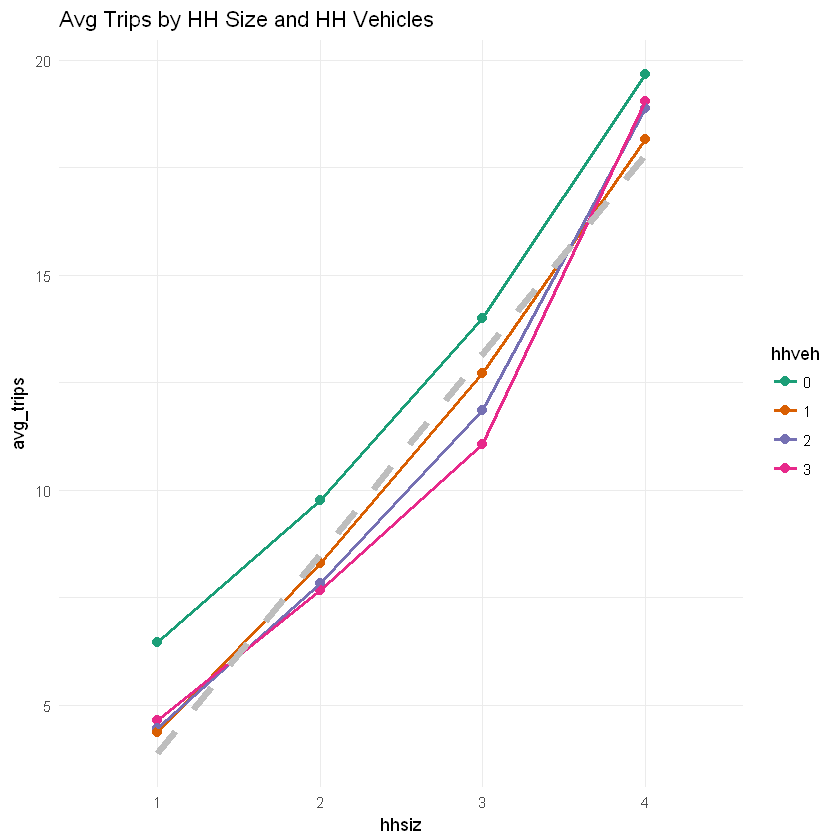

In [164]:
df.persveh$hhveh <- as.factor(df.persveh$hhveh)
df.persveh$hhsiz <- as.factor(df.persveh$hhsiz)

df.persveh%>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=hhveh, group=hhveh)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=hhveh), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by HH Size and HH Vehicles") +
    scale_color_brewer(palette="Dark2")

In [165]:
persveh.fit <- lm(htrips ~ factor(hhsiz) + factor(hhveh), data=df.persveh.new)
print(persveh.fit)
summary(persveh.fit)


Call:
lm(formula = htrips ~ factor(hhsiz) + factor(hhveh), data = df.persveh.new)

Coefficients:
   (Intercept)  factor(hhsiz)2  factor(hhsiz)3  factor(hhsiz)4  factor(hhveh)1  
         6.367           3.635           7.483          14.648          -1.911  
factor(hhveh)2  factor(hhveh)3  
        -2.111          -2.310  




Call:
lm(formula = htrips ~ factor(hhsiz) + factor(hhveh), data = df.persveh.new)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.015  -3.740  -0.456   2.943  62.295 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      6.3673     0.3254  19.565  < 2e-16 ***
factor(hhsiz)2   3.6352     0.2218  16.392  < 2e-16 ***
factor(hhsiz)3   7.4831     0.2715  27.566  < 2e-16 ***
factor(hhsiz)4  14.6482     0.2621  55.895  < 2e-16 ***
factor(hhveh)1  -1.9111     0.3494  -5.469 4.69e-08 ***
factor(hhveh)2  -2.1106     0.3696  -5.710 1.18e-08 ***
factor(hhveh)3  -2.3103     0.3854  -5.994 2.15e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.98 on 6442 degrees of freedom
Multiple R-squared:  0.4156,	Adjusted R-squared:  0.4151 
F-statistic: 763.6 on 6 and 6442 DF,  p-value: < 2.2e-16


## Avg Trips by HH Size and Income

In [194]:
df.persinc <- df.hbw %>%
    select(hhsiz, income, htrips) %>%
    filter(income < 99) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    mutate(income = recode(income, `1`=1, `2`=1, `3`=2, `4`=2, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhsiz, income) %>%
    mutate(avg_trips = mean(htrips))

df.persinc$ResError <- (df.persinc$htrips - 
                           df.persinc$avg_trips)^2
df.persinc$TotError <- (df.persinc$htrips - 
                           mean(df.persinc$htrips))^2
SSE <- sum(df.persinc$ResError)
SST <- sum(df.persinc$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 7
n <- nrow(df.persinc)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

persinc.fit <- lm(htrips ~ factor(hhsiz) * factor(income), 
                  data=df.persinc)
print(persinc.fit)
summary(persinc.fit)

[1] 0.4184151
[1] 0.4178346

Call:
lm(formula = htrips ~ factor(hhsiz) * factor(income), data = df.persinc)

Coefficients:
                   (Intercept)                  factor(hhsiz)2  
                       4.73400                         2.69630  
                factor(hhsiz)3                  factor(hhsiz)4  
                       4.95718                        11.34176  
               factor(income)2                 factor(income)3  
                      -0.01916                        -0.07656  
factor(hhsiz)2:factor(income)2  factor(hhsiz)3:factor(income)2  
                      -0.42064                         1.01926  
factor(hhsiz)4:factor(income)2  factor(hhsiz)2:factor(income)3  
                       1.16897                         0.85861  
factor(hhsiz)3:factor(income)3  factor(hhsiz)4:factor(income)3  
                       2.59048                         3.09656  




Call:
lm(formula = htrips ~ factor(hhsiz) * factor(income), data = df.persinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.096  -3.226  -0.715   2.904  48.924 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     4.73400    0.26500  17.864  < 2e-16 ***
factor(hhsiz)2                  2.69630    0.53200   5.068 4.13e-07 ***
factor(hhsiz)3                  4.95718    0.76588   6.473 1.04e-10 ***
factor(hhsiz)4                 11.34176    0.77603  14.615  < 2e-16 ***
factor(income)2                -0.01916    0.37132  -0.052 0.958841    
factor(income)3                -0.07656    0.36190  -0.212 0.832463    
factor(hhsiz)2:factor(income)2 -0.42064    0.65884  -0.638 0.523203    
factor(hhsiz)3:factor(income)2  1.01926    0.94333   1.080 0.279966    
factor(hhsiz)4:factor(income)2  1.16897    0.96637   1.210 0.226460    
factor(hhsiz)2:factor(income)3  0.85861    0.60367   1.422 0.154988    
factor(hhsiz)3:fact

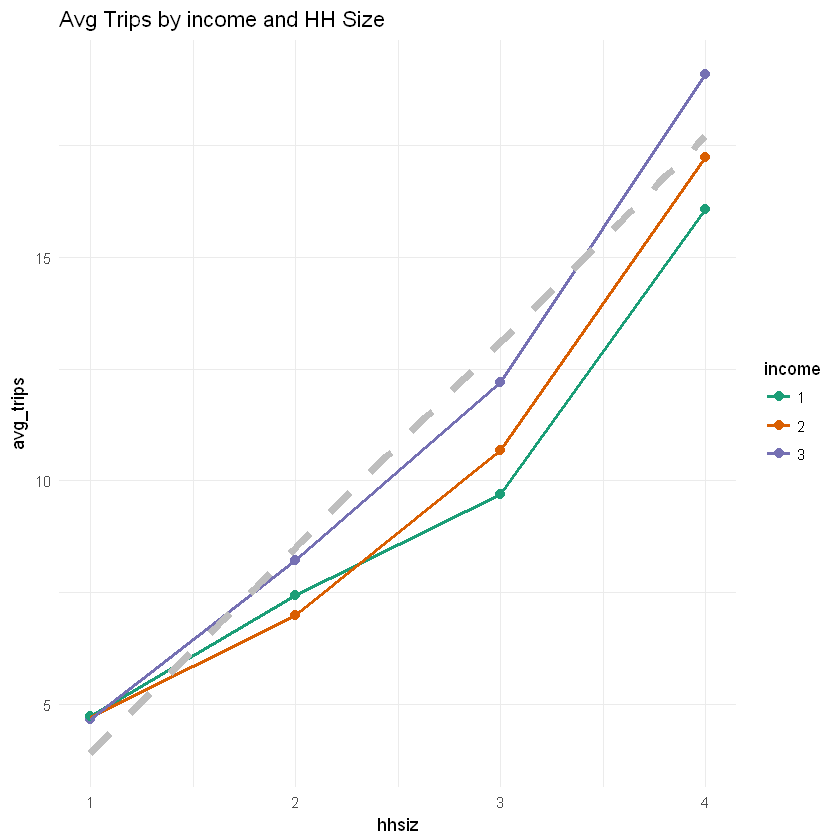

In [167]:
# Graph Avg Trips by income and HH Size
df.persinc$income <- as.factor(df.persinc$income)

df.persinc %>%
    ggplot(aes(x=hhsiz, y=avg_trips, color=income, group=income)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhsiz, y=avg_trips, color=income), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by income and HH Size") +
    scale_color_brewer(palette="Dark2")

In [171]:
# HH Size Income continuous
df.persinc <- df.hbw %>%
    select(hhsiz, income, htrips) %>%
    filter(income < 99) %>%
    mutate(hhsiz = recode(hhsiz, `1`=1, `2`=2, `3`=3, `4`=4, `5`=4, 
                          `6`=4, `7`=4, `8`=4)) %>%
    group_by(hhsiz, income) %>%
    mutate(avg_trips = mean(htrips))

df.persinc$ResError <- (df.persinc$htrips - 
                           df.persinc$avg_trips)^2
df.persinc$TotError <- (df.persinc$htrips - 
                           mean(df.persinc$htrips))^2
SSE <- sum(df.persinc$ResError)
SST <- sum(df.persinc$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 11
n <- nrow(df.persinc)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

persinc.fit <- lm(htrips ~ factor(hhsiz) + factor(income), 
                  data=df.persinc)
print(persinc.fit)
summary(persinc.fit)

[1] 0.420007
[1] 0.4190414

Call:
lm(formula = htrips ~ factor(hhsiz) + factor(income), data = df.persinc)

Coefficients:
    (Intercept)   factor(hhsiz)2   factor(hhsiz)3   factor(hhsiz)4  
        4.55774          2.77485          6.57532         13.42852  
factor(income)2  factor(income)3  factor(income)4  factor(income)5  
       -0.24720         -0.46169         -0.01122          0.50752  
factor(income)6  factor(income)7  factor(income)8  
        0.88626          1.06040          1.29325  




Call:
lm(formula = htrips ~ factor(hhsiz) + factor(income), data = df.persinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.047  -3.622  -0.618   2.909  47.261 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.55774    0.33979  13.414  < 2e-16 ***
factor(hhsiz)2   2.77485    0.20900  13.277  < 2e-16 ***
factor(hhsiz)3   6.57532    0.25913  25.374  < 2e-16 ***
factor(hhsiz)4  13.42852    0.24640  54.500  < 2e-16 ***
factor(income)2 -0.24720    0.43044  -0.574  0.56579    
factor(income)3 -0.46169    0.43270  -1.067  0.28602    
factor(income)4 -0.01122    0.40416  -0.028  0.97784    
factor(income)5  0.50752    0.38246   1.327  0.18457    
factor(income)6  0.88626    0.39395   2.250  0.02451 *  
factor(income)7  1.06040    0.40290   2.632  0.00851 ** 
factor(income)8  1.29325    0.44100   2.933  0.00337 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.933 on 6008 degrees of freedom
M

## Trips by Income and HHVeh

In [192]:
df.vehinc <- df.hbw %>%
    select(hhveh, income, htrips) %>%
    filter(income < 99) %>%
    mutate(hhveh = recode(hhveh, `0`=0, `1`=1, `2`=2, `3`=3, `4`=3, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    mutate(income = recode(income, `1`=1, `2`=1, `3`=2, `4`=2, `5`=3, 
                          `6`=3, `7`=3, `8`=3)) %>%
    group_by(hhveh, income) %>%
    mutate(avg_trips = mean(htrips))

df.vehinc$ResError <- (df.persinc$htrips - 
                           df.vehinc$avg_trips)^2
df.vehinc$TotError <- (df.vehinc$htrips - 
                           mean(df.vehinc$htrips))^2
SSE <- sum(df.vehinc$ResError)
SST <- sum(df.vehinc$TotError)
R2 <- 1 - (SSE/SST)
print(R2)
k <- 7
n <- nrow(df.vehinc)
adj.R2 <- R2 - ((1 - R2)*(k - 1) / (n - k - 1))
print(adj.R2)

persinc.fit <- lm(htrips ~ factor(hhveh) + factor(income), 
                  data=df.vehinc)
print(persinc.fit)
summary(persinc.fit)

[1] 0.09106187
[1] 0.09015459

Call:
lm(formula = htrips ~ factor(hhveh) + factor(income), data = df.vehinc)

Coefficients:
    (Intercept)   factor(hhveh)1   factor(hhveh)2   factor(hhveh)3  
          7.413           -1.852            1.284            1.656  
factor(income)2  factor(income)3  
          0.473            2.981  




Call:
lm(formula = htrips ~ factor(hhveh) + factor(income), data = df.vehinc)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.050  -5.170  -1.678   3.322  56.303 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       7.4129     0.4251  17.437  < 2e-16 ***
factor(hhveh)1   -1.8525     0.4537  -4.083  4.5e-05 ***
factor(hhveh)2    1.2843     0.4708   2.728 0.006391 ** 
factor(hhveh)3    1.6563     0.4912   3.372 0.000752 ***
factor(income)2   0.4730     0.3482   1.359 0.174353    
factor(income)3   2.9810     0.3265   9.130  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.408 on 6013 degrees of freedom
Multiple R-squared:  0.08999,	Adjusted R-squared:  0.08923 
F-statistic: 118.9 on 5 and 6013 DF,  p-value: < 2.2e-16


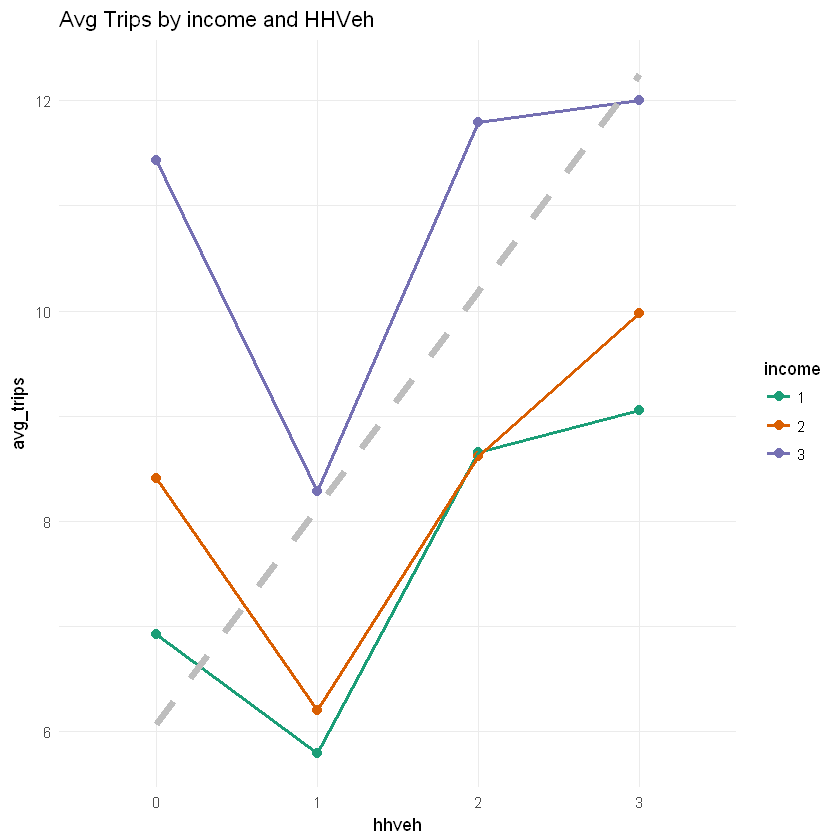

In [170]:
# Graph Avg Trips by HHVeh and income
df.vehinc$income <- as.factor(df.vehinc$income)
df.vehinc$hhveh <- as.factor(df.vehinc$hhveh)

df.vehinc %>%
    ggplot(aes(x=hhveh, y=avg_trips, color=income, group=income)) + 
    theme_minimal() +
    geom_point(size=2.5) +
    geom_line(aes(x=hhveh, y=avg_trips, color=income), size=1) +
    stat_smooth(method=lm, se=FALSE, linetype="dashed", aes(group=1), 
                size=2, color="gray") +
    labs(title= "Avg Trips by income and HHVeh") +
    scale_color_brewer(palette="Dark2")